In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import time
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('Dummies.csv')

In [18]:
df.loc[df['Indemne']==1,'grav']= int(0)
df.loc[df['Blessé léger']==1,'grav']= int(1)
df.loc[df['Blessé hospitalisé']==1,'grav']= int(2)
df.loc[df['Tué']==1,'grav']= int(3)
df['grav']=df['grav'].astype(int)

In [19]:

g=['Indemne','Tué','Blessé hospitalisé','Blessé léger','grav']
l=list(df.drop(columns=g).columns)
X=df[l].values
Y=df['grav'].values
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.3,train_size=0.7)
logreg=LogisticRegression(multi_class='ovr', solver='liblinear')
logreg2=LogisticRegression(multi_class='ovr',max_iter=1000, solver='newton-cg')
#ne fonctionne pas (ni 'saga') logreg3=LogisticRegression(multi_class='ovr',max_iter=1000, solver='sag')

In [20]:
start=time.time()
logreg.fit(X_train,Y_train)
end=time.time()
t=end-start
t

15.141518115997314

In [21]:
start=time.time()
logreg2.fit(X_train,Y_train)
end=time.time()
t=end-start
t

148.16211414337158

In [ ]:
#import time
#start=time.time()
#logreg3.fit(X_train,Y_train)
#end=time.time()
#t=end-start
#t

In [22]:
Y_hat=logreg.predict(X_test)
Y_hat_2=logreg2.predict(X_test)

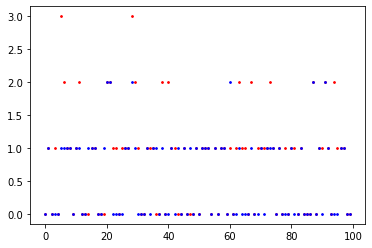

<Figure size 7200x72 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
x= np.arange(0,100)
plt.scatter(x,Y_test[0:100],s=3,color='red')
plt.scatter(x,Y_hat[0:100],s=3,color='blue')
figure(figsize=(100,1 ))
plt.show()


In [24]:
acc1= accuracy_score(Y_test, Y_hat)
acc2=accuracy_score(Y_test, Y_hat_2)

In [26]:
acc1

0.6489613198531261

In [27]:
acc2

0.6488858709320456

In [ ]:

#liblinear et newton solver qui fonctionnent 
#pénalisation L1 ou L2 pour le premier et L1 pour le deuxieme 
#essai

In [28]:
logreg_penal_1=LogisticRegression(multi_class='ovr', solver='liblinear',penalty='l1')
logreg_penal_2=LogisticRegression(multi_class='ovr', solver='liblinear',penalty='l2')

In [29]:
start=time.time()
logreg_penal_1.fit(X_train,Y_train)
end=time.time()
t=end-start
t

45.53638410568237

In [30]:
Y_hat_penalty1= logreg_penal_1.predict(X_test)
acc1_penal1= accuracy_score(Y_test, Y_hat_penalty1)
gain1_penal1= acc1 - acc1_penal1
gain1_penal1

2.5149640360155878e-05

In [31]:
start=time.time()
logreg_penal_2.fit(X_train,Y_train)
end=time.time()
t=end-start
t
#gros gain de temps sur la pénalité L1

15.871536016464233

In [33]:
Y_hat_penalty2= logreg_penal_2.predict(X_test)
acc1_penal2= accuracy_score(Y_test, Y_hat_penalty2)
gain1_penal2= acc1 - acc1_penal2
gain1_penal2
#aucun gain 
#interprétation des résultats?

0.0

A faire : 
- tester la regression après sélection de variable par random forest pour voir si ca donne mieux 
- tester la pénalisation après séléction de variable 
- essayer de trouver une méthode 'ordinale'